<a href="https://colab.research.google.com/github/vovsiienko/IT496_Course_acitvities/blob/master/IT496_ViktoriiaO_Assignment5_DuPontAnalysis_Robinhood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import requests
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

myAPIKey = '6e7abf1b234f34338f72bf5742f79107'

#Walmart
stock = 'HOOD'

balanceStatements = requests.get (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
                                  
incomeStatements = requests.get (f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}").json()
                                 
print (balanceStatements[:3])

[{'date': '2021-12-31', 'symbol': 'HOOD', 'reportedCurrency': 'USD', 'cik': '0001783879', 'fillingDate': '2022-02-24', 'acceptedDate': '2022-02-24 16:06:16', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 6253477000, 'shortTermInvestments': 27189000, 'cashAndShortTermInvestments': 6280666000, 'netReceivables': 6727226000, 'inventory': 0.0, 'otherCurrentAssets': 6275650000, 'totalCurrentAssets': 19283542000, 'propertyPlantEquipmentNet': 146419000, 'goodwill': 100521000, 'intangibleAssets': 34107000, 'goodwillAndIntangibleAssets': 134628000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 204590000, 'totalNonCurrentAssets': 485637000, 'otherAssets': 0.0, 'totalAssets': 19769179000, 'accountPayables': 252313000, 'shortTermDebt': 0.0, 'taxPayables': 0.0, 'deferredRevenue': 0.0, 'otherCurrentLiabilities': 12095029000, 'totalCurrentLiabilities': 12347342000, 'longTermDebt': 0.0, 'deferredRevenueNonCurrent': 0.0, 'deferredTaxLiabilitiesNonCurrent': 0.

In [9]:
#the numbers from the three most recent years
threeYearBalanceStatements = balanceStatements[:3]
threeYearIncomeStatements = incomeStatements[:3]

In [10]:
#calculate profitability, assesTurnOver, and capitaStructure
#this is net income/sales - first fraction in DuPont analysis framework
profitability=[]
#this is net sales/assests - second fraction
assetTurnOver=[]
#this is assests/avg. shareholders equity  - third fraction
capitalStructure=[]
#the result of DuPontAnalysis
returnOnEquity = []
#dates
dates = []

#getting details
for i in range (0,3):
  #datesValue =threeYearBalanceStatements[i]['date']
  #dates.append(datesValue)

  dates.append(threeYearBalanceStatements[i]['date'])

  profitabilityValue=round((threeYearIncomeStatements[i]['netIncome']/threeYearIncomeStatements[i]['revenue']),2)
  profitability.append(profitabilityValue)
  
  assetTurnOverValue=round((threeYearIncomeStatements[i]['revenue']/threeYearBalanceStatements[i]['totalAssets']),2)
  assetTurnOver.append(assetTurnOverValue)

  capitalStructureValue=round((threeYearBalanceStatements[i]['totalAssets']/threeYearBalanceStatements[i]['totalStockholdersEquity']),2)
  capitalStructure.append(capitalStructureValue)

  returnOnEquityValue=round((profitabilityValue*assetTurnOverValue*capitalStructureValue),2)
  returnOnEquity.append(returnOnEquityValue)

print(returnOnEquity)


[-0.5, -0.18, 1.08]


In [11]:
from numpy.ma.core import sort
from datetime import date
from pandas.core.arrays import datetimes
DuPontDF = pd.DataFrame(columns=['date','profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity'])

DuPontDF['date']=dates
DuPontDF['profitability']=profitability
DuPontDF['assetTurnOver']=assetTurnOver
DuPontDF['capitalStructure']=capitalStructure
DuPontDF['returnOnEquity']=returnOnEquity

DuPontDF = DuPontDF.sort_values(by='date', ascending=True)

print(DuPontDF)

         date  profitability  assetTurnOver  capitalStructure  returnOnEquity
2  2019-12-31          -0.38           0.07            -40.64            1.08
1  2020-12-31           0.01           0.09           -198.63           -0.18
0  2021-12-31          -2.03           0.09              2.71           -0.50


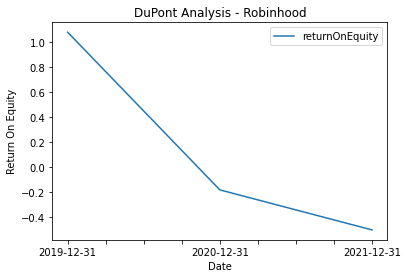

In [12]:
DuPontDF.plot(x='date', y='returnOnEquity', kind='line')
plt.title('DuPont Analysis - Robinhood')
plt.xlabel('Date')
plt.ylabel('Return On Equity')
plt.show()

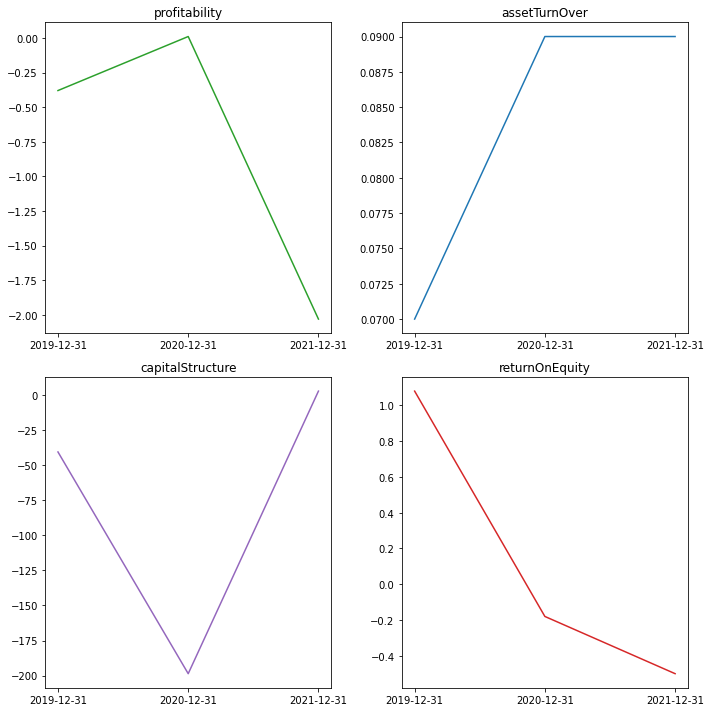

In [13]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
#set x for all them
x=DuPontDF['date']

#top left
axs[0,0].plot(x,DuPontDF['profitability'],'tab:green')
axs[0,0].set_title('profitability')

#top right
axs[0,1].plot(x,DuPontDF['assetTurnOver'])
axs[0,1].set_title('assetTurnOver')

#bottom left
axs[1,0].plot(x,DuPontDF['capitalStructure'], 'tab:purple')
axs[1,0].set_title('capitalStructure')

#bottom right
axs[1,1].plot(x,DuPontDF['returnOnEquity'], 'tab:red')
axs[1,1].set_title('returnOnEquity')

fig.tight_layout()